In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('gdrive/My Drive/hypothyroid_modified_cjlin.arff')
df = pd.DataFrame(data[0])

In [3]:
print(df.shape)

(3399, 23)


In [4]:
for data in df.iloc:
  print(data)
  break

age                                   41
sex                                 b'F'
on thyroxine                        b'f'
query on thyroxine                  b'f'
on antithyroid medication           b'f'
sick                                b'f'
pregnant                            b'f'
thyroid surgery                     b'f'
I131 treatment                      b'f'
query hypothyroid                   b'f'
query hyperthyroid                  b'f'
lithium                             b'f'
goitre                              b'f'
tumor                               b'f'
hypopituitary                       b'f'
psych                               b'f'
TSH                                  1.3
T3                                   2.5
TT4                                  125
T4U                                 1.14
FTI                                  109
referral source                  b'SVHC'
Class                        b'negative'
Name: 0, dtype: object


In [5]:
df=df.replace(b'f',0)
df=df.replace(b't',1)
df=df.replace(b'M',1)
df=df.replace(b'F',0)

In [6]:
import numpy as np
refer_source = np.array([[x[21]] for x in df.iloc])
class_ = np.array([[x[22]] for x in df.iloc])
class_

array([[b'negative'],
       [b'negative'],
       [b'negative'],
       ...,
       [b'negative'],
       [b'negative'],
       [b'negative']], dtype='|S23')

In [7]:
from sklearn.preprocessing import OneHotEncoder
ht_enc = OneHotEncoder(handle_unknown='ignore')

In [12]:
ht_enc.fit(refer_source)
refer_onehot = ht_enc.transform(refer_source).toarray()
refer_onehot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [9]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

lben = LabelEncoder()
enc_y = lben.fit_transform(class_.ravel())
class_onehot = tf.keras.utils.to_categorical(enc_y)
class_onehot

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split

df.pop('Class')
df.pop('referral source')

0        b'SVHC'
1       b'other'
2       b'other'
3       b'other'
4         b'SVI'
          ...   
3394    b'other'
3395      b'SVI'
3396    b'other'
3397      b'SVI'
3398    b'other'
Name: referral source, Length: 3399, dtype: object

In [13]:
df.values
x_features = np.concatenate((df.values,refer_onehot),axis=1)

In [60]:
x_features = x_features.astype(np.float64)
x_features[np.isnan(x_features)]=0


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(x_features, class_onehot, test_size=0.2, random_state=0)

In [62]:
X_train.shape

(2719, 26)

In [63]:
import tensorflow as tf

def customClassifier(class_num,name):
  model = tf.keras.models.Sequential(name=name)
  model.add(tf.keras.layers.Dense(32,input_dim=26,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(32,activation='relu'))
  model.add(tf.keras.layers.Dense(class_num,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=['accuracy'])
  return model

In [64]:
classifier = customClassifier(4,"classifier")

In [71]:
history = classifier.fit(x=X_train,y=Y_train,epochs=20,validation_split=0.1,batch_size=10)

Epoch 1/20
245/245 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9812 - val_loss: 0.0454 - val_accuracy: 0.9890
Epoch 2/20
245/245 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9820 - val_loss: 0.0615 - val_accuracy: 0.9816
Epoch 3/20
245/245 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9792 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 4/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9767 - val_loss: 0.0565 - val_accuracy: 0.9890
Epoch 5/20
245/245 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9787 - val_loss: 0.0377 - val_accuracy: 0.9853
Epoch 6/20
245/245 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9828 - val_loss: 0.0322 - val_accuracy: 0.9963
Epoch 7/20
245/245 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9812 - val_loss: 0.0446 - val_accuracy: 0.9779
Epoch 

In [72]:
classifier.evaluate(X_test,Y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9735


[0.17811019718647003, 0.9735293984413147]

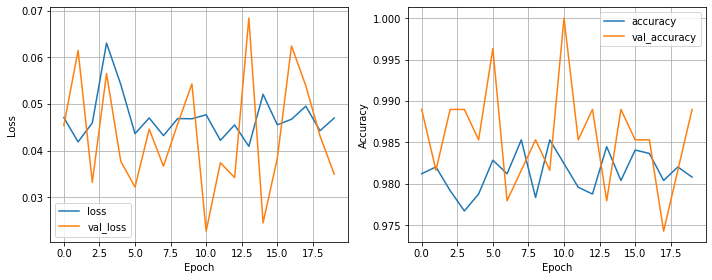

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(random_state=96)
dt_clf.fit(X_train,Y_train)
dt_acc = dt_clf.score(X_test,Y_test)
print('decision tree accuracy: {:.3f}'.format(dt_acc))

decision tree accuracy: 0.999


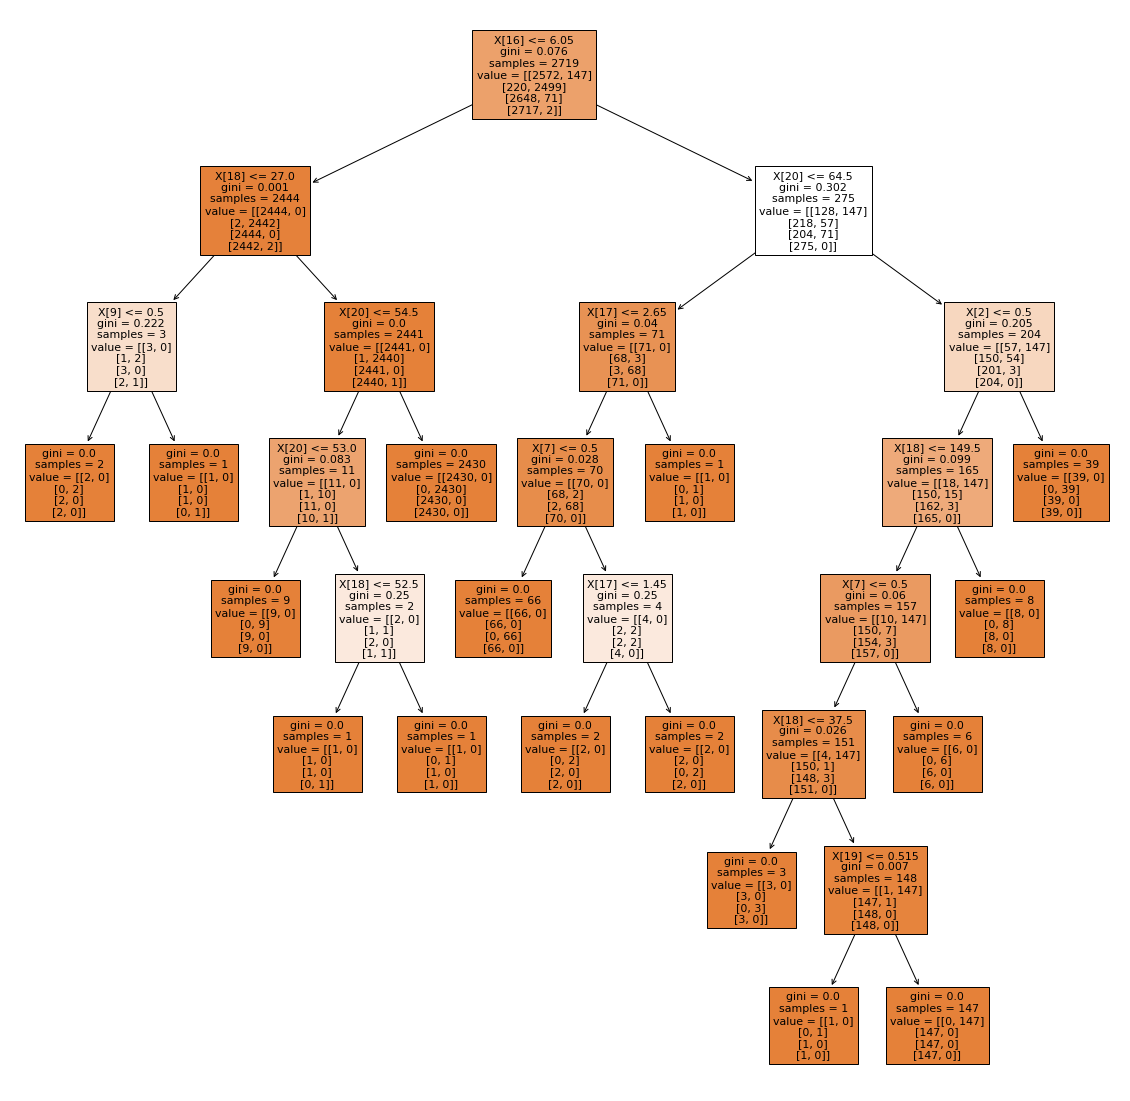

In [74]:
plt.figure(figsize=(20,20))
a=plot_tree(dt_clf, filled=True)
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier( random_state = 0 )
clf.fit(X_train,Y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(y_predict,Y_test)
print('Random forest classifier accuracy: {:.3f}'.format(acc))

Random forest classifier accuracy: 0.993


In [83]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovr')
svm_clf.fit(X_train,np.argmax(Y_train, axis=1))
y_predict = svm_clf.predict(X_test)
acc = accuracy_score(y_predict,np.argmax(Y_test, axis=1))
print('Support Vector machine accuracy: {:.3f}'.format(acc))

Random forest classifier accuracy: 0.935


In [95]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
y_pred = SGD_clf.fit(X_train, np.argmax(Y_train, axis=1)).predict(X_test)
acc = accuracy_score(y_pred,np.argmax(Y_test, axis=1))
print('Stochastic Gradient Descent accuracy: {:.3f}'.format(acc))

Stochastic Gradient Descent accuracy: 0.943


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
